<code>plot_NSIDC_regional_boundaries.ipynb</code>.  Highlight the regions used in this study on a map.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import pandas as pd
import os
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [12]:
save_dir = '../../figures/'

Load sio mask and make a quick plot just to make sure it looks reasonable.

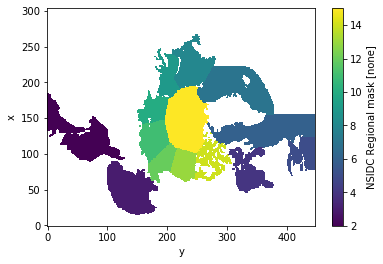

In [5]:
ds_region = xr.open_dataset('/home/disk/sipn/nicway/data/grids/sio_2016_mask_Update.nc')
mask_plot = ds_region.where(ds_region.mask.isin(ds_region.ocean_regions))
ds_region_comb = mask_plot.copy()
region_names = ds_region_comb.region_names
ds_region_comb.mask.plot()

Clean that plot up! First, we need to combine the regions that we combined in our study (i.e., Kara Sea and Laptev Sea).  We also need to combine a couple of regions that we include in pan-Arctic sea ice estimates but that we don't analyze separately (i.e., Canadian Islands, Baffin Bay). 

In [7]:
ds_region['region_names']

<xarray.DataArray 'region_names' (nregions: 21)>
array(['Ice-free Oceans', 'Sea of Okhotsk', 'Bering', 'Hudson Bay', 'St John',
       'Baffin Bay', 'East Greenland Sea', 'Barents Sea', 'Kara Sea',
       'Laptev Sea', 'East Siberian Sea', 'Chukchi Sea', 'Beaufort Sea',
       'Canadian Islands', 'Central Arctic', 'null', 'null', 'null', 'null',
       'land', 'land outline'], dtype=object)
Coordinates:
    region_names  (nregions) object 'Ice-free Oceans' ... 'land outline'
  * nregions      (nregions) int64 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21

We'll re-write parts of the mask to both combine regions and to make values farther apart so the colors will contrast more.  This is clunky but oh well. 

In [10]:
# East Siberian/Beaufort/Chukchi
mask_plot2 = mask_plot.where((~mask_plot.mask.isin([11,12,13])),30)
# Kara-Laptev
mask_plot2 = mask_plot2.where((~mask_plot.mask.isin([9,10])),35)
# Barents
mask_plot2 = mask_plot2.where((~mask_plot.mask.isin([8,8.5])),40)
# East Greenland
mask_plot2 = mask_plot2.where((~mask_plot.mask.isin([7,7.5])),45)
# Central Arctic
mask_plot2 = mask_plot2.where((~mask_plot.mask.isin([15,15.5])),50)
# Regions that are in pan-Arctic but are not separate
mask_plot2 = mask_plot2.where((~mask_plot.mask.isin([4,6,14])),55)
# Bering Sea
mask_plot2 = mask_plot2.where((~mask_plot.mask.isin([3,3.5])),25)
# Regions we don't include in pan-Arctic
mask_plot2 = mask_plot2.where((~mask_plot.mask.isin([2,5])),np.nan)


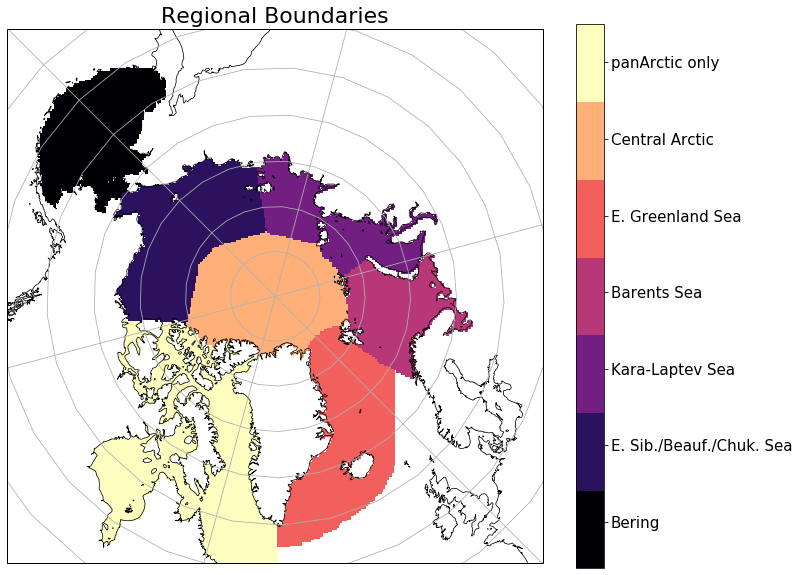

In [13]:
cbar_labels = ['Bering','E. Sib./Beauf./Chuk. Sea','Kara-Laptev Sea','Barents Sea','E. Greenland Sea',
              'Central Arctic','panArctic only']
fig2 = plt.figure(figsize=(12,10))
ax2 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax2.set_extent([0, 359, 55, 90],crs=ccrs.PlateCarree())
ax2.coastlines(linewidth=0.75,color='black',resolution='50m')
ax2.gridlines(crs=ccrs.PlateCarree(),linestyle='-')
pcmask = mask_plot2.mask.plot.pcolormesh(ax=ax2,x='lon',y='lat',transform=ccrs.PlateCarree(),levels=8,vmin=24.5,vmax=60,
              cmap='magma',cbar_kwargs={'ticks':[np.arange(27.5,61,5)]})
                                                                          #'ylabels':cbar_labels})
#cbmask = ax2.colorbar(pcmask,pad=0.15,label='Sea Ice Concentration')
cbar = ax2.collections[-1].colorbar
cbar.set_label('')
cbar.ax.set_yticklabels(cbar_labels,fontsize=15)
ax2.set_title('Regional Boundaries',fontsize=22)
fig2.savefig(save_dir+'regions_aggregate.pdf',format='pdf',bbox_inches='tight')
fig2.savefig(save_dir+'regions_aggregate.png',format='png',dpi=350,bbox_inches='tight')